In [ ]:
file = '/home/becode/dr-robin/topiknlp/data/60th TOPIK I Test Papers.pdf'

In [59]:
from io import StringIO

from pdfminer.converter import TextConverter
from pdfminer.layout import LAParams
from pdfminer.pdfdocument import PDFDocument
from pdfminer.pdfinterp import PDFResourceManager, PDFPageInterpreter
from pdfminer.pdfpage import PDFPage
from pdfminer.pdfparser import PDFParser

output_string = StringIO()
with open(file, 'rb') as in_file:
    parser = PDFParser(in_file)
    doc = PDFDocument(parser)
    rsrcmgr = PDFResourceManager()
    device = TextConverter(rsrcmgr, output_string, laparams=LAParams())
    interpreter = PDFPageInterpreter(rsrcmgr, device)
    for page in PDFPage.create_pages(doc):
        interpreter.process_page(page)

txt = output_string.getvalue()

In [62]:
from konlpy.tag import Kkma
from konlpy.utils import pprint
kkma = Kkma()
pprint(kkma.sentences(u'네, 안녕하세요. 반갑습니다.'))
pprint(kkma.nouns(u'질문이나 건의사항은 깃헙 이슈 트래커에 남겨주세요.'))
pprint(kkma.pos(u'오류보고는 실행환경, 에러메세지와함께 설명을 최대한상세히!^^'))

['네, 안녕하세요.', '반갑습니다.']
['질문', '건의', '건의사항', '사항', '깃헙', '이슈', '트래커']
[('오류', 'NNG'),
 ('보고', 'NNG'),
 ('는', 'JX'),
 ('실행', 'NNG'),
 ('환경', 'NNG'),
 (',', 'SP'),
 ('에러', 'NNG'),
 ('메세지', 'NNG'),
 ('와', 'JKM'),
 ('함께', 'MAG'),
 ('설명', 'NNG'),
 ('을', 'JKO'),
 ('최대한', 'NNG'),
 ('상세히', 'MAG'),
 ('!', 'SF'),
 ('^^', 'EMO')]


nchars  : 18884
ntokens : 4178
nmorphs : 1499

Top 20 frequent morphemes:
[(('의', 'J'), 396),
 (('.', 'S'), 340),
 (('하', 'X'), 291),
 (('에', 'J'), 283),
 (('ㄴ다', 'E'), 241),
 (('ㄴ', 'E'), 223),
 (('이', 'J'), 221),
 (('을', 'J'), 211),
 (('은', 'J'), 184),
 (('어', 'E'), 176),
 (('를', 'J'), 148),
 (('ㄹ', 'E'), 134),
 (('하', 'P'), 124),
 (('는', 'J'), 117),
 (('법률', 'N'), 115),
 ((',', 'S'), 99),
 (('는', 'E'), 97),
 (('있', 'P'), 96),
 (('되', 'X'), 94),
 (('수', 'N'), 91)]

Locations of "대한민국" in the document:
0	대한민국헌법 유구한 역사와
9	대한국민은 3·1운동으로 건립된 대한민국임시정부의 법통과 불의에
98	총강 제1조 ① 대한민국은 민주공화국이다. ②대한민국의
100	① 대한민국은 민주공화국이다. ②대한민국의 주권은 국민에게
110	나온다. 제2조 ① 대한민국의 국민이 되는
126	의무를 진다. 제3조 대한민국의 영토는 한반도와
133	부속도서로 한다. 제4조 대한민국은 통일을 지향하며,
147	추진한다. 제5조 ① 대한민국은 국제평화의 유지에
787	군무원이 아닌 국민은 대한민국의 영역안에서는 중대한
1836	파견 또는 외국군대의 대한민국 영역안에서의 주류에
3620	경제 제119조 ① 대한민국의 경제질서는 개인과


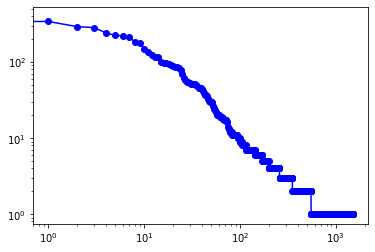

In [64]:
###example getting words

from collections import Counter

from konlpy.corpus import kolaw
from konlpy.tag import Hannanum
from konlpy.utils import concordance, pprint
from matplotlib import pyplot


def draw_zipf(count_list, filename, color='blue', marker='o'):
    sorted_list = sorted(count_list, reverse=True)
    pyplot.plot(sorted_list, color=color, marker=marker)
    pyplot.xscale('log')
    pyplot.yscale('log')
    pyplot.savefig(filename)


doc = kolaw.open('constitution.txt').read()
pos = Hannanum().pos(doc)
cnt = Counter(pos)

print('nchars  :', len(doc))
print('ntokens :', len(doc.split()))
print('nmorphs :', len(set(pos)))
print('\nTop 20 frequent morphemes:'); pprint(cnt.most_common(20))
print('\nLocations of "대한민국" in the document:')
concordance(u'대한민국', doc, show=True)

draw_zipf(cnt.values(), 'zipf.png')

In [63]:
#example of chunking
import konlpy
import nltk

# POS tag a sentence
sentence = u'만 6세 이하의 초등학교 취학 전 자녀를 양육하기 위해서는'
words = konlpy.tag.Twitter().pos(sentence)

# Define a chunk grammar, or chunking rules, then chunk
grammar = """
NP: {<N.*>*<Suffix>?}   # Noun phrase
VP: {<V.*>*}            # Verb phrase
AP: {<A.*>*}            # Adjective phrase
"""
parser = nltk.RegexpParser(grammar)
chunks = parser.parse(words)
print("# Print whole tree")
print(chunks.pprint())

print("\n# Print noun phrases only")
for subtree in chunks.subtrees():
    if subtree.label()=='NP':
        print(' '.join((e[0] for e in list(subtree))))
        print(subtree.pprint())

# Display the chunk tree
chunks.draw()



/home/becode/anaconda3/lib/python3.7/site-packages/konlpy/tag/_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


# Print whole tree
(S
  (NP 만/Noun 6/Number 세/Noun 이하/Noun)
  의/Josa
  (NP 초등학교/Noun 취학/Noun 전/Noun 자녀/Noun)
  를/Josa
  (NP 양육/Noun)
  (VP 하기/Verb)
  (NP 위/Noun)
  (VP 해서는/Verb))
None

# Print noun phrases only
만 6 세 이하
(NP 만/Noun 6/Number 세/Noun 이하/Noun)
None
초등학교 취학 전 자녀
(NP 초등학교/Noun 취학/Noun 전/Noun 자녀/Noun)
None
양육
(NP 양육/Noun)
None
위
(NP 위/Noun)
None
